In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import GPy
from smt.sampling_methods import LHS
from dside import DSI
from kernel_opt_fun import *

In [2]:
# step 1. Mathematical problem formulation
# Define the objective function which can be any 2D function
def f(X):
    #expl4 (Gomez function) from Sasena (2002)
    return (4 - 2.1 * X[:, 0]**2 + 1/3 * X[:, 0]**4) * X[:, 0]**2 + X[:, 0] *X[:, 1] + (-4 + 4 * X[:, 1]**2) * X[:, 1]**2

In [3]:
#step 2. Surrogate model training
# Generate LHS training samples

xlimits = np.array([
    [-1,1],
    [-1,1],
])
sampling = LHS(xlimits=xlimits, criterion='ese')

n = 31 # the size of the training set is user defined, 100*D gives high fidelity surrogate model
x_LHS = sampling(n)

# Create input X arrays
X1 = x_LHS[:,0]
X2 = x_LHS[:,1]
X = np.vstack((X1.flatten(), X2.flatten())).T 

Y = f(X).reshape(-1, 1)


In [4]:
# Kernel optimisation 

best_kernel, best_mea = find_best_kernel(X, Y, input_dim=2) 

print("Best kernel:", kernel_to_str(best_kernel))
print(f"Best MEA: {best_mea:.3f}")

#GPR training 
model = GPy.models.GPRegression(X, Y, best_kernel)

reconstraining parameters std_periodic.lengthscale
reconstraining parameters std_periodic.variance
reconstraining parameters std_periodic.period


Kernel: rbf + rbf_1, MAE: 0.23693515566311651
Kernel: rbf * rbf_1, MAE: 0.23693510426686495
Kernel: rbf + linear, MAE: 0.2369354153036853
Kernel: rbf * linear, MAE: 0.20185545874501631
Kernel: rbf + RatQuad, MAE: 0.21890278880808195
Kernel: rbf * RatQuad, MAE: 0.2369351145518229
Kernel: rbf + std_periodic, MAE: 0.29110693023720635
Kernel: rbf * std_periodic, MAE: 0.2369273696210436
Kernel: linear + rbf, MAE: 0.2369354153001619
Kernel: linear * rbf, MAE: 0.20185545874500524
Kernel: linear + linear_1, MAE: 0.48253884430032634
Kernel: linear * linear_1, MAE: 0.3706191119206311
Kernel: linear + RatQuad, MAE: 0.23354220613658314
Kernel: linear * RatQuad, MAE: 0.18307990831400828
Kernel: linear + std_periodic, MAE: 0.5971785526614488
Kernel: linear * std_periodic, MAE: 0.1990327208730329
Kernel: RatQuad + rbf, MAE: 0.21890278909565378
Kernel: RatQuad * rbf, MAE: 0.23693511619755192
Kernel: RatQuad + linear, MAE: 0.23354220613667667
Kernel: RatQuad * linear, MAE: 0.18308592539253007
Kernel: R

 /Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/paramz/transformations.py:111: RuntimeWarning:overflow encountered in expm1


Kernel: RatQuad * std_periodic + rbf + rbf_1, MAE: 0.01338206857365082


 /Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/paramz/transformations.py:111: RuntimeWarning:overflow encountered in expm1


Kernel: RatQuad * std_periodic + rbf * rbf, MAE: 0.013310159777311658
Kernel: RatQuad * std_periodic + rbf + linear, MAE: 0.013377038812252077


 /Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/paramz/transformations.py:111: RuntimeWarning:overflow encountered in expm1
 /Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/paramz/transformations.py:111: RuntimeWarning:overflow encountered in expm1


Kernel: RatQuad * std_periodic + rbf * linear, MAE: 0.16892214625074478


 /Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/paramz/transformations.py:111: RuntimeWarning:overflow encountered in expm1


Kernel: RatQuad * std_periodic + rbf + RatQuad, MAE: 0.013373925413358207


 /Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/paramz/transformations.py:111: RuntimeWarning:overflow encountered in expm1


Kernel: RatQuad * std_periodic + rbf * RatQuad, MAE: 0.013374325570238538


 /Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/paramz/transformations.py:111: RuntimeWarning:overflow encountered in expm1


Kernel: RatQuad * std_periodic + rbf + std_periodic, MAE: 0.10654769767500043


 /Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/paramz/transformations.py:111: RuntimeWarning:overflow encountered in expm1


Kernel: RatQuad * std_periodic + rbf * std_periodic, MAE: 0.023825106880781155


 /Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/paramz/transformations.py:111: RuntimeWarning:overflow encountered in expm1


Kernel: RatQuad * std_periodic + rbf * rbf + rbf, MAE: 0.01330965725810192


 /Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/paramz/transformations.py:111: RuntimeWarning:overflow encountered in expm1


Kernel: RatQuad * std_periodic + rbf * rbf * rbf_1, MAE: 0.013272294795826393


 /Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/paramz/transformations.py:111: RuntimeWarning:overflow encountered in expm1


Kernel: RatQuad * std_periodic + rbf * rbf + linear, MAE: 0.013434161361793106


 /Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/paramz/transformations.py:111: RuntimeWarning:overflow encountered in expm1


Kernel: RatQuad * std_periodic + rbf * rbf * linear, MAE: 0.17265430626623024


 /Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/paramz/transformations.py:111: RuntimeWarning:overflow encountered in expm1


Kernel: RatQuad * std_periodic + rbf * rbf + RatQuad, MAE: 0.23664701181441958


 /Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/paramz/transformations.py:111: RuntimeWarning:overflow encountered in expm1


Kernel: RatQuad * std_periodic + rbf * rbf * RatQuad, MAE: 0.013309904940014489


 /Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/paramz/transformations.py:111: RuntimeWarning:overflow encountered in expm1


Kernel: RatQuad * std_periodic + rbf * rbf + std_periodic, MAE: 0.027132238174476575


 /Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/paramz/transformations.py:111: RuntimeWarning:overflow encountered in expm1


Kernel: RatQuad * std_periodic + rbf * rbf * std_periodic, MAE: 0.024185572755410518


 /Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/paramz/transformations.py:111: RuntimeWarning:overflow encountered in expm1


Kernel: RatQuad * std_periodic + rbf * rbf * rbf_1 + rbf, MAE: 0.018288468921644128


 /Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/paramz/transformations.py:111: RuntimeWarning:overflow encountered in expm1


Kernel: RatQuad * std_periodic + rbf * rbf * rbf_1 * rbf_2, MAE: 0.013259144288242179


 /Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/paramz/transformations.py:111: RuntimeWarning:overflow encountered in expm1


Kernel: RatQuad * std_periodic + rbf * rbf * rbf_1 + linear, MAE: 0.0132834156875072


 /Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/paramz/transformations.py:111: RuntimeWarning:overflow encountered in expm1


Kernel: RatQuad * std_periodic + rbf * rbf * rbf_1 * linear, MAE: 0.19964117852074167


 /Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/paramz/transformations.py:111: RuntimeWarning:overflow encountered in expm1


Kernel: RatQuad * std_periodic + rbf * rbf * rbf_1 + RatQuad, MAE: 0.010695270749729101


 /Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/paramz/transformations.py:111: RuntimeWarning:overflow encountered in expm1


Kernel: RatQuad * std_periodic + rbf * rbf * rbf_1 * RatQuad, MAE: 0.015449472724214512


 /Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/paramz/transformations.py:111: RuntimeWarning:overflow encountered in expm1


Kernel: RatQuad * std_periodic + rbf * rbf * rbf_1 + std_periodic, MAE: 0.028232651124845305


 /Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/paramz/transformations.py:111: RuntimeWarning:overflow encountered in expm1


Kernel: RatQuad * std_periodic + rbf * rbf * rbf_1 * std_periodic, MAE: 0.48016409972371615

Results of each iteration:
Iteration 1: Best Kernel: RatQuad * std_periodic, MAE: 0.11703
Iteration 2: Best Kernel: RatQuad * std_periodic + rbf, MAE: 0.01338
Iteration 3: Best Kernel: RatQuad * std_periodic + rbf * rbf, MAE: 0.01331
Iteration 4: Best Kernel: RatQuad * std_periodic + rbf * rbf * rbf_1, MAE: 0.01327
Iteration 5: Best Kernel: RatQuad * std_periodic + rbf * rbf * rbf_1 + RatQuad, MAE: 0.01070
Best kernel: RatQuad * std_periodic + rbf * rbf * rbf_1 + RatQuad
Best MEA: 0.011


In [5]:
#using the GPy function optimize hyperparameters are optimized for a better fit
model.optimize(messages=True)

Running L-BFGS-B (Scipy implementation) Code:
  runtime   i      f              |g|        
    00s04  0005   7.558255e+00   2.561355e+02 
    00s06  0007   7.397376e+00   2.447417e+02 
    00s13  0015  -1.511180e+01   7.116222e+01 
    00s19  0022  -2.111400e+01   2.000541e-06 

 /Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/paramz/transformations.py:111: RuntimeWarning:overflow encountered in expm1



    00s42  0057  -2.111400e+01   2.466954e-06 
Runtime:     00s42
Optimization status: ErrorABNORMAL_TERMINATION_IN_LNSRCH



In [6]:
# Re-generate sample points for plotting (with finer grid so function trends are clearly seen)
n = 100 # user defined, would generate n^D samples

#for plotting linspace is most convinient 
X1 = np.linspace(-1, 1, n) 
X2 = np.linspace(-1, 1, n)

X1, X2 = np.meshgrid(X1, X2)

X = np.vstack((X1.flatten(), X2.flatten())).T
Y = f(X).reshape(-1, 1)

#predicting Y values based on the trained GP
X_pred = X
Y_pred, Y_pred_var = model.predict(X_pred)

# Reshape for plotting
Y_pred = Y_pred.reshape(X1.shape)
Y_true = f(X_pred).reshape(X1.shape)


In [7]:
#Surrogate metrics
from sklearn.metrics import mean_absolute_error 
from sklearn.metrics import mean_absolute_percentage_error 

MAE = mean_absolute_error(Y_true, Y_pred)
print(f"MAE = {MAE:.5f}")

MAE = 0.00480


In [8]:
# #uncomment this cell if using the MAPE from the sklearn package and it comes out unproportionally large
# #helps investigate large MAPE by calculating the % of near zero Y that can cause it
# import matplotlib.pyplot as plt

# # Plot the distribution of Y_true
# plt.hist(Y_true, bins=50, edgecolor='black')
# plt.title("Distribution of True Values (Y_true)")
# plt.xlabel("Y_true")
# plt.ylabel("Frequency")
# plt.show()

# # Calculate the percentage of small values baaed on Ytrue
# threshold = 1e-3
# percentsmallY = percentage_small_values(Y_true, threshold)

# print(f"Percentage of small true values (|Y_true| < {threshold}): {percentsmallY:.2f}%")

In [9]:
# Calculate custom MAPE (includes a small constant to account for near zero values)
custom_MAPE = custom_mape(Y_true, Y_pred)
print(f"Custom MAPE = {custom_MAPE:.2f}%")

Custom MAPE = 6.08%


In [10]:
#surrogate model metrics
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
R2score = r2_score(Y_true, Y_pred)
MSE = mean_squared_error(Y_true, Y_pred)
print(f"R2 = {R2score:.2f}")
print(f"MSE = {MSE:.5f}")

R2 = 1.00
MSE = 0.00007


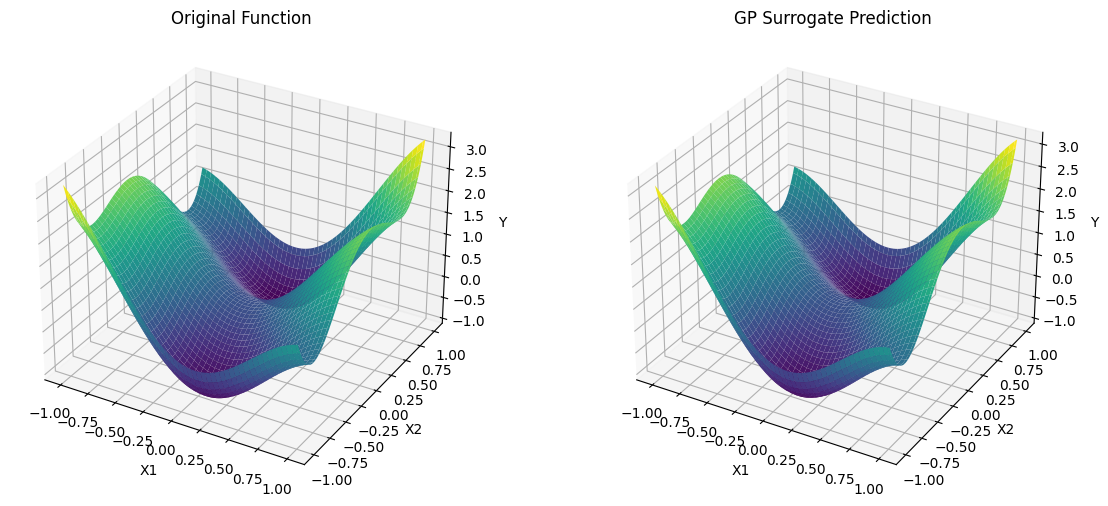

In [11]:

# Plotting of the original vs surrogate 
fig = plt.figure(figsize=(14, 6))

# Original data
ax1 = fig.add_subplot(121, projection='3d')
ax1.plot_surface(X1, X2, Y_true, cmap='viridis')
ax1.set_title('Original Function')
ax1.set_xlabel('X1')
ax1.set_ylabel('X2')
ax1.set_zlabel('Y')

# Surrogate model prediction
ax2 = fig.add_subplot(122, projection='3d')
ax2.plot_surface(X1, X2, Y_pred, cmap='viridis')
ax2.set_title('GP Surrogate Prediction')
ax2.set_xlabel('X1')
ax2.set_ylabel('X2')
ax2.set_zlabel('Y')

plt.show()

Text(0.5, 0, 'Y')

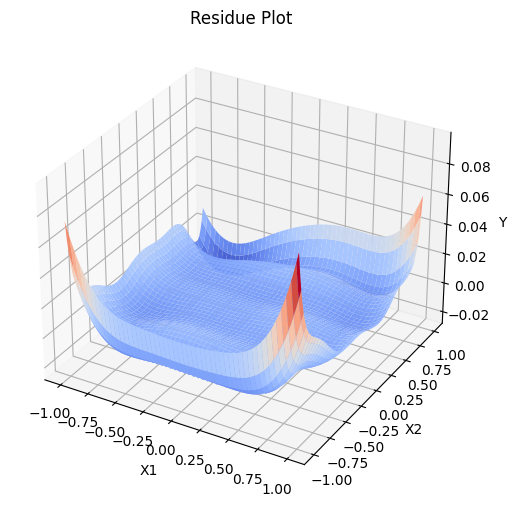

In [12]:
# Residual Plotting
fig = plt.figure(figsize=(14, 6))

# Original data
ax1 = fig.add_subplot(121, projection='3d')
ax1.plot_surface(X1, X2, Y_true-Y_pred, cmap='coolwarm')
ax1.set_title('Residue Plot')
ax1.set_xlabel('X1')
ax1.set_ylabel('X2')
ax1.set_zlabel('Y')

In [13]:
#step 3. Surrogte model simulation
# regenerating samples with Sobol
lbd = [-1, -1]
ubd = [1,1]
pwr = 13
X = Sobol_sequence(lbd, ubd, pwr)
X1 = np.array(X[:,0])
X2 = np.array(X[:,1])

X = np.vstack((X1.flatten(), X2.flatten())).T
Y = f(X).reshape(-1, 1)
# predicting Y values
X_pred = X
Y_pred, Y_pred_var = model.predict(X_pred)
Y_true = Y

# Flatten the arrays
X1_flat = X1.flatten()
X2_flat = X2.flatten()
Y_true_flat = Y_true.flatten()
Y_pred_flat = Y_pred.flatten()


# Create a DataFrame
data = {
    'X1': X1_flat,
    'X2': X2_flat,
    'Y_true': Y_true_flat,
    'Y_pred': Y_pred_flat,
}
df = pd.DataFrame(data)

# Display the DataFrame
print(df)

            X1       X2    Y_true    Y_pred
0    -1.000000 -1.00000  3.233333  3.158427
1     0.000000  0.00000  0.000000 -0.000201
2     0.500000 -0.50000 -0.126042 -0.124837
3    -0.500000  0.50000 -0.126042 -0.126012
4    -0.250000 -0.25000  0.070003  0.071588
...        ...      ...       ...       ...
8187 -0.249756  0.81665 -0.851095 -0.843780
8188 -0.499756 -0.43335  0.479688  0.481557
8189  0.500244  0.56665  0.286189  0.284712
8190  0.000244 -0.93335 -0.449244 -0.445686
8191 -0.999756  0.06665  2.148618  2.132013

[8192 rows x 4 columns]


In [14]:
# #uncomment for 2D plotting of Ytrue vs Ypred
# fig, ax = plt.subplots(1, 2, figsize=(16, 6))  # Adjusted figsize for better layout
# fs = 14
# # Scatter plot for Y_true
# sc1 = ax[0].scatter(df['X1'], df['X2'], c=df['Y_true'], marker='.', cmap='viridis')
# cbar1 = fig.colorbar(sc1, ax=ax[0])
# ax[0].set_title('Y_true', fontsize=fs)
# ax[0].set_xlabel('X1', fontsize=fs)
# ax[0].set_ylabel('X2', fontsize=fs)
# ax[0].set_yticks([-1, -0.5, 0, 0.5, 1])

# # Scatter plot for Y_pred
# sc2 = ax[1].scatter(df['X1'], df['X2'], c=df['Y_pred'], marker='.', cmap='viridis')
# cbar2 = fig.colorbar(sc2, ax=ax[1])
# ax[1].set_title('Y_pred', fontsize=fs)
# ax[1].set_xlabel('X1', fontsize=fs)
# ax[1].set_ylabel('X2', fontsize=fs)
# ax[1].set_yticks([-1, -0.5, 0, 0.5, 1])

# plt.tight_layout()
# plt.show()

In [15]:
#step 4. DSp identification
# Define our design input labels
vn = ['X1', 'X2']
# Define the function constraints (KPI constraints) as a dictionary
df['G1'] = (-np.sin(4 * np.pi * X1_flat)) + 2 * (np.sin(2 * np.pi * X2_flat))**2
u = -0
constraints = {'Y_pred': [-0.9711, 1e20], 'G1': [-1e20, u]}

# Initialize the design space entity
ds = DSI(df)
# Apply the constraints separating the satisfied and violated points
ds.screen(constraints)
# Finding the design space (alpha shape space reconstruction)
ds.find_DSp(vn)



Bisection search for alpha multiplier (radius)
    tol: 1.00e-03  maxiter: 50
    lb:  1.00e-30  ub:      5.00e+00
    maxvp: 0.00e+00  maxvnum: 0.00
____________________________________________________________________________________________
 No iter  |  alpha multiplier  |   Violation Flag   | Number vio inside  |   Bisection Gap    
____________________________________________________________________________________________
    1     |     2.500e+00      |        True        |        5645        |     2.500e+00      
    2     |     1.250e+00      |        True        |        5640        |     1.250e+00      
    3     |     6.250e-01      |        True        |        5636        |     6.250e-01      
    4     |     3.125e-01      |        True        |        5598        |     3.125e-01      
    5     |     1.562e-01      |        True        |        5485        |     1.562e-01      
    6     |     7.812e-02      |        True        |        646         |     7.812e-02      

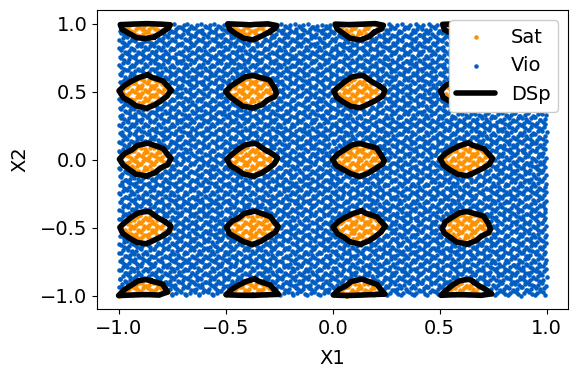

Check for violations inside design space:
Empty DataFrame
Columns: [X1, X2, Y_true, Y_pred, G1, SatFlag]
Index: []


In [16]:

# Plot the design space
ds.plot()
plt.show()

# Check if there are any violated points in the design space
print('Check for violations inside design space:')
print(ds.vindsp)

In [17]:
#preparing the Ypred for confusion matrix analysis 
YpredFlag = np.array(ds.df['SatFlag'], dtype=int)
YpredFlag

array([1, 1, 0, ..., 0, 0, 0])

In [18]:
#similarly generating the satflag list with the true Y
constraintsT = {'Y_true': [-0.9711, 1e20], 'G1': [-1e20, u]}

# Initialize the design space entity
dsT = DSI(df)
# Apply the constraints separating the satisfied and violated points
dsT.screen(constraintsT)

YtrueFlag = np.array(dsT.df['SatFlag'], dtype=int)
YtrueFlag

array([1, 1, 0, ..., 0, 0, 0])

In [19]:

metrics = evaluate_metrics(YtrueFlag, YpredFlag)
print(metrics)

[[6715    0]
 [   0 1477]]
{'Confusion Matrix': array([[6715,    0],
       [   0, 1477]]), 'Accuracy': 1.0, 'Recall': 1.0, 'Precision': 1.0, 'F1 Score': 1.0}
